In [0]:
import csv 
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as mpl
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.preprocessing import scale 
from google.colab import files 
from sklearn import preprocessing 

In [0]:
files.upload()



Saving Z Scores General Model 1 - Copy.csv to Z Scores General Model 1 - Copy.csv


{'Z Scores General Model 1 - Copy.csv': b'Facility Name,Hospital overall rating,Beds Available ,Doctors on Duty,Distance,Y\r\nNORTH TEXAS STATE HOSPITAL,3,19,19,28,0\r\nMAGEE GENERAL HOSPITAL,3,5,11,2,0\r\nCYPRESS CREEK HOSPITAL,3,7,7,12,0\r\nMARSHALL COUNTY HEALTHCARE CENTER - CAH,3,7,12,20,0\r\nJOHN SEED HOSPITAL,3,16,9,12,0\r\nST. HOPE HOSPITAL,3,17,13,11,0\r\nPARK ROYAL HOSPITAL,2,13,18,5,0\r\nGREENWICH HOSPITAL ASSOCIATION -,3,6,12,11,0\r\nKINGWOOD PINES HOSPITAL,3,6,5,5,0\r\nVETERANS MEMORIAL HOSPITAL,1,3,6,19,0\r\nPROVO CANYON BEHAVIORAL HOSPITAL,3,9,6,29,0\r\nMANHATTAN PSYCHIATRIC CENTER,4,20,19,10,1\r\nSUMMIT MEDICAL CENTER,2,4,19,1,0\r\nMCCURTAIN MEMORIAL HOSPITAL,5,4,7,22,1\r\nSELLS HOSPITAL,5,23,8,6,1\r\nOCEANS BEHAVIORAL HOSPITAL OF ABILENE,4,8,8,18,0\r\nBRATTLEBORO RETREAT,3,29,8,26,0\r\nGREENE COUNTY HOSPITAL,2,25,18,2,0\r\nCOMANCHE COUNTY HOSPITAL,2,30,14,18,0\r\nSUNDANCE HOSPITAL,2,27,11,27,0\r\nPATRICK B HARRIS PSYCHIATRIC HOSPITAL,4,18,15,18,1\r\nLBJ TROPICAL MEDICAL

In [0]:
df = pd.read_csv('Z Scores General Model 1 - Copy.csv')

In [0]:
df

,Facility Name,Hospital overall rating,Beds Available,Doctors on Duty,Distance,Y
0,NORTH TEXAS STATE HOSPITAL,3,19,19,28,0
1,MAGEE GENERAL HOSPITAL,3,5,11,2,0
2,CYPRESS CREEK HOSPITAL,3,7,7,12,0
3,MARSHALL COUNTY HEALTHCARE CENTER - CAH,3,7,12,20,0
4,JOHN SEED HOSPITAL,3,16,9,12,0
...,...,...,...,...,...,...
4290,CEDAR CREEK HOSPITAL,2,28,7,23,0
4291,LAWRENCE MEMORIAL HOSPITAL,3,23,5,9,0
4292,INSPIRA MEDICAL CENTER ELMER,4,10,13,4,1
4293,CITIZENS MEDICAL CENTER,5,16,8,9,1


In [0]:
dataset = df.values


In [0]:
dataset

array([['NORTH TEXAS STATE HOSPITAL', 3, 19, 19, 28, 0],
       ['MAGEE GENERAL HOSPITAL', 3, 5, 11, 2, 0],
       ['CYPRESS CREEK HOSPITAL', 3, 7, 7, 12, 0],
       ...,
       ['INSPIRA MEDICAL CENTER ELMER', 4, 10, 13, 4, 1],
       ['CITIZENS MEDICAL CENTER', 5, 16, 8, 9, 1],
       ['NORTHERN MAINE MEDICAL CENTER', 5, 9, 13, 2, 1]], dtype=object)

In [0]:
X = dataset[:,1:5]
Y = dataset[:,5]

In [0]:
from sklearn import preprocessing

In [0]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [0]:
X_scale

array([[0.5       , 0.60714286, 0.93333333, 0.93103448],
       [0.5       , 0.10714286, 0.4       , 0.03448276],
       [0.5       , 0.17857143, 0.13333333, 0.37931034],
       ...,
       [0.75      , 0.28571429, 0.53333333, 0.10344828],
       [1.        , 0.5       , 0.2       , 0.27586207],
       [1.        , 0.25      , 0.53333333, 0.03448276]])

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [0]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [0]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(3006, 4) (644, 4) (645, 4) (3006,) (644,) (645,)


In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv1D
from keras.layers import LSTM 

In [0]:
model = Sequential([
    Dense(64,activation='relu'),
    Dense(64, activation='relu'),
    Dense(64,activation='relu'),
    Dense(10, activation='relu'),
    Dense(1,activation='sigmoid')
])

In [0]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=500,
          validation_data=(X_val, Y_val))

Train on 3006 samples, validate on 644 samples
Epoch 1/500
3006/3006 [==============================] - 1s 220us/step - loss: nan - acc: 0.3623 - val_loss: nan - val_acc: 0.3509
Epoch 2/500
3006/3006 [==============================] - 0s 133us/step - loss: nan - acc: 0.3543 - val_loss: nan - val_acc: 0.3509
Epoch 3/500
3006/3006 [==============================] - 0s 128us/step - loss: nan - acc: 0.3540 - val_loss: nan - val_acc: 0.3509
Epoch 4/500
3006/3006 [==============================] - 0s 130us/step - loss: nan - acc: 0.3543 - val_loss: nan - val_acc: 0.3509
Epoch 5/500
3006/3006 [==============================] - 0s 140us/step - loss: nan - acc: 0.3540 - val_loss: nan - val_acc: 0.3509
Epoch 6/500
3006/3006 [==============================] - 0s 128us/step - loss: nan - acc: 0.3540 - val_loss: nan - val_acc: 0.3509
Epoch 7/500
3006/3006 [==============================] - 0s 128us/step - loss: nan - acc: 0.3540 - val_loss: nan - val_acc: 0.3509
Epoch 8/500
3006/3006 [=============

KeyboardInterrupt: ignored

In [0]:
model.evaluate(X_test, Y_test)[1]

645/645 [==============================] - 0s 69us/step


0.9891472868217054

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 64)                320       
_________________________________________________________________
dense_12 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                650       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 11        
Total params: 9,301
Trainable params: 9,301
Non-trainable params: 0
_________________________________________________________________


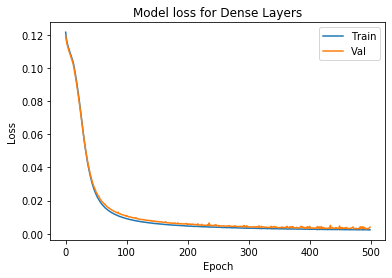

In [0]:
mpl.plot(hist.history['loss'])
mpl.plot(hist.history['val_loss'])
mpl.title('Model loss for Dense Layers')
mpl.ylabel('Loss')
mpl.xlabel('Epoch')
mpl.legend(['Train', 'Val'], loc='upper right')
mpl.show()

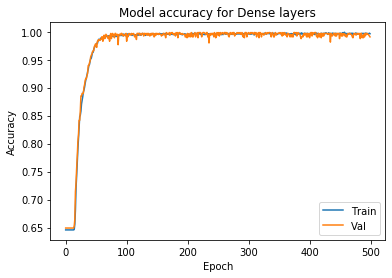

In [0]:
mpl.plot(hist.history['acc'])
mpl.plot(hist.history['val_acc'])
mpl.title('Model accuracy for Dense layers')
mpl.ylabel('Accuracy')
mpl.xlabel('Epoch')
mpl.legend(['Train', 'Val'], loc='lower right')
mpl.show()